# Data Generation - Central Limit Theorem Simulation
> *April 2, 2018*

<img src="img/datageneration.jpeg" style="float:left;max-height:300px;border:1px solid black">

This notebook contains the code for generating data that follows any given distribution function. In the process, the Central Limit Theorem is simulated.

---

## Contents

1. **Four Random Functions**
2. **Population Distribution**
3. **Sampling Distribution**
---

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

## 1. Four Random Functions
We define four functions: a logit, a Gauss, a discontinuous 'winner' and a sine function. The idea is to sample data that is distributed according to these curves. 

In [157]:
# FUNCTION 1
def logit(x, position = 0.3, spread = -10, setoff = 1, altitude = -1):
    return (1/(1+np.exp(spread * (x - position)))) * altitude + setoff

# FUNCTION 2
def gauss(x, mean=0.8, stdev=0.15, altitude=1, height=0):
    gauss = (np.power(np.e, -np.square(x-mean)/(2*np.square(stdev))) / np.sqrt(2 * np.pi * np.square(stdev)))
    gauss = gauss / (1 / (np.sqrt(2*np.pi) * stdev)) * altitude
    gauss = gauss + height
    return gauss

# FUNCTION 3
def winner(x, position = None):
    xPoints = np.linspace(0, 1, 5)
    yPoints = [1, 0, 0.5, 0, 1]
    h = interp1d(xPoints, yPoints)
    return h(x)

# FUNCTION 4
def sine(x, position = 0.5):
    return (np.sin(10*x + position))*0.5+0.5

def daysBeforePurchase(x):
    return x

functions = [daysBeforePurchase, logit, winner, sine]

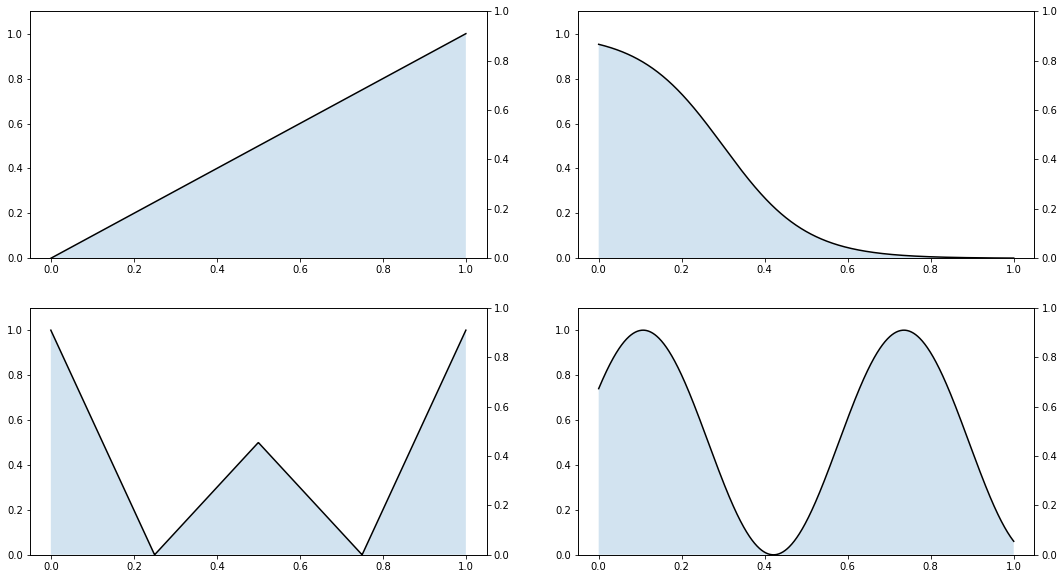

In [158]:
x = np.linspace(0, 1, num=1000)
fig = plt.figure(figsize=(18, 10))
for i, f in enumerate(functions):
    ax = fig.add_subplot(221+i); ax2 = ax.twinx()
    ax.plot(x, f(x), '-k'); ax.set_ylim(0,1.1)
    ax.fill_between(x, 0, f(x), alpha=0.2)
plt.show()

## 2. Population Distribution
Now we sample 1000 numbers between 0 and 1 in a way that their distributions follow the curves above. We can do so with this function.

In [89]:
def generateDistribution(function, size=1):
    if size==1:
        x = np.random.rand()
        y = function(x)
        if np.random.rand() <= y: return x
        return generateDistribution(function)
    else: return np.array([generateDistribution(function) for _ in range(size)])

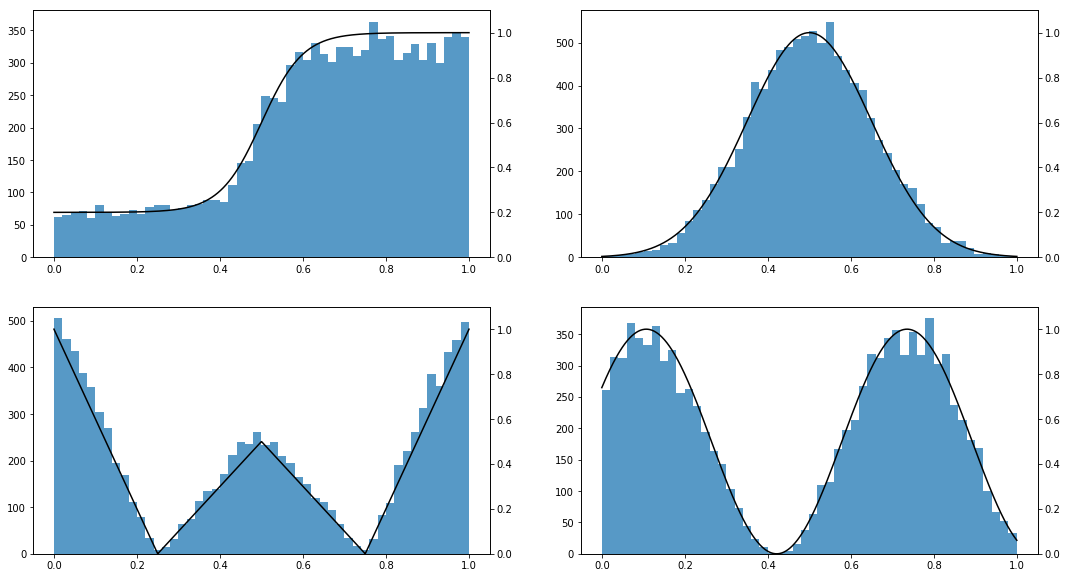

In [90]:
x = np.linspace(0, 1, num=1000)
fig = plt.figure(figsize=(18, 10))
mean, sd = [], []
for i, f in enumerate(functions):
    ax = fig.add_subplot(221+i); ax2 = ax.twinx()
    population = generateDistribution(f, 10000)
    ax.hist(population, bins=50, alpha=0.75)
    mean.append(population.mean())
    sd.append(np.std(population))
    ax2.plot(x, f(x), '-k'); ax2.set_ylim(0,1.1)
plt.show()

## 3. Sampling Distribution
If we take 10k of these samples, but with only 5 datapoints each, their means are always follow a normal distribution. This is the Central Limit Theorem.

In [6]:
SIZE = 5
SAMPLES = 10000
ZSCORE = 1.96

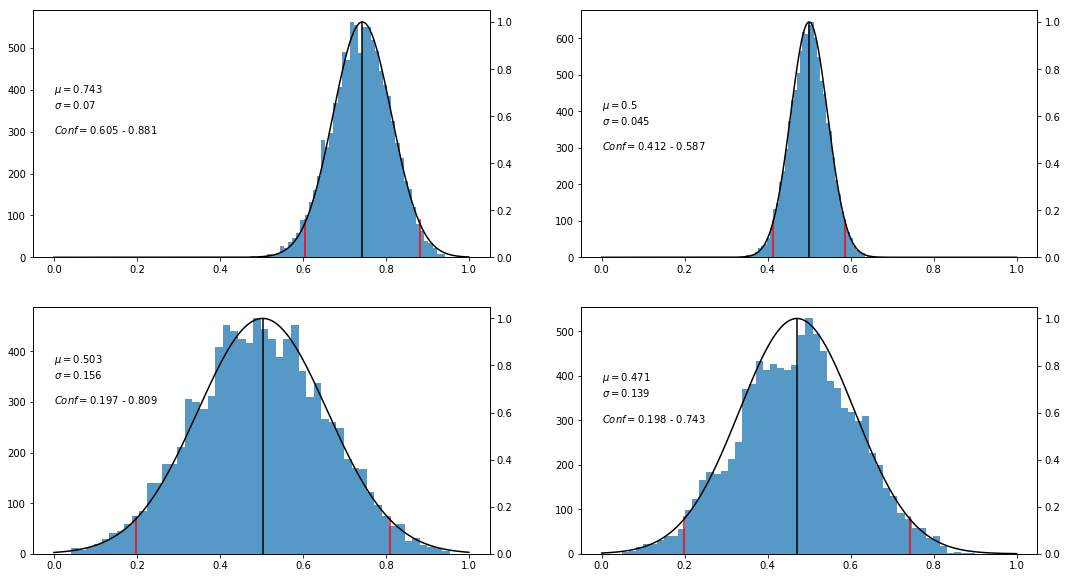

In [7]:
x = np.linspace(0, 1, num=1000)
fig = plt.figure(figsize=(18, 10))
for i, f in enumerate(functions):
    ax = fig.add_subplot(221+i); ax2 = ax.twinx()
    
    samplemeans = [generateDistribution(f, SIZE).mean() for _ in range(SAMPLES)]
    se = sd[i] / np.sqrt(SIZE)
    ci = (mean[i]-ZSCORE*se, mean[i]+ZSCORE*se) # = norm.interval(0.95, mean[i], se)
    
    ax.hist(samplemeans, bins=50, alpha=0.75)
    ax2.plot(x, gauss(x, mean[i], se), '-k'); ax2.set_ylim(0,)
    ax.text(0, 300, r'$\mu =$' + str(round(mean[i], 3)) + '\n' + r'$\sigma =$' + str(round(se, 3)) +
            '\n\n' + r'$Conf = $' + str(round(ci[0], 3)) + ' - ' + str(round(ci[1], 3)))
    
    ax.axvline(x=ci[0], color='r', ymax=0.15)
    ax.axvline(x=ci[1], color='r', ymax=0.15)
    ax.axvline(x=mean[i], color='k', ymax=0.95)
plt.show()